In [1]:
%matplotlib inline

In [2]:
import requests
import re
from fastai.text import *
import torch

In [3]:
book = requests.get('https://www.gutenberg.org/files/36/36-0.txt').text

In [4]:
start_iter = re.finditer('BOOK ONE', book)

In [5]:
next(start_iter)

<_sre.SRE_Match object; span=(1067, 1075), match='BOOK ONE'>

Commenting out some print lines here to shrink the notebook -- I did some exploration to figure out where the actual story began and ended (excluding table of contents, acknowledgements, etc.)

In [6]:
# book[1067:]

In [7]:
next(start_iter)

<_sre.SRE_Match object; span=(1920, 1928), match='BOOK ONE'>

In [8]:
# book[1920:]

In [9]:
book = book[1920:]

In [10]:
end_iter = re.finditer("among the dead.", book)

In [11]:
next(end_iter)

<_sre.SRE_Match object; span=(64109, 64124), match='among the dead '>

In [12]:
# book[:64125]

In [13]:
next(end_iter)

<_sre.SRE_Match object; span=(345594, 345609), match='among the dead.'>

In [14]:
# book[:345609]

In [15]:
book = book[:345609]

In [16]:
book = re.sub(r'[\r\n]+', ' ', str(book))

In [17]:
# book

In [18]:
tokens = [i.replace(',', '') for i in book.split('.')]

In [19]:
# tokens

In [20]:
tokens[:10]

['BOOK ONE THE COMING OF THE MARTIANS I',
 ' THE EVE OF THE WAR',
 ' No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than manâ\x80\x99s and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water',
 ' With infinite complacency men went to and fro over this globe about their little affairs serene in their assurance of their empire over matter',
 ' It is possible that the infusoria under the microscope do the same',
 ' No one gave a thought to the older worlds of space as sources of human danger or thought of them only to dismiss the idea of life upon them as impossible or improbable',
 ' It is curious to recall some of the mental habits of those departed days',
 ' At most terrestrial men fa

In [21]:
! rm book_text.csv

In [22]:
with open('book_text.csv', 'a+') as file:
    for sentence in tokens:
        file.write(sentence + '\n')

In [23]:
with open('book_text.csv') as file:
    lines = file.readlines()[:5]
print(lines[0])
print(lines[1])
print(lines[2])

BOOK ONE THE COMING OF THE MARTIANS I

 THE EVE OF THE WAR

 No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than manâs and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water



In [24]:
data = TextLMDataBunch.from_csv('.', 'book_text.csv', text_cols=0, max_vocab=1000, min_freq=2)

In [25]:
data

TextLMDataBunch;

Train: LabelList (2434 items)
x: LMTextList
xxbos i made a step to it and stood looking out,xxbos xxmaj but the artilleryman xxunk me : âitâs no xxunk to the right sort of xxunk he said xxunk make her a xxunk ; and in the end i xxunk to go with him under cover of the woods northward as far as xxmaj street xxmaj xxunk before i xxunk with him,xxbos xxmaj every minute a fresh gun came into position until before twilight every xxunk every xxunk of xxunk xxunk on the xxunk xxunk about xxmaj kingston and xxmaj richmond xxunk an xxunk black xxunk,xxbos xxmaj the hood xxunk flashed was xxunk off in a dozen xxunk xxunk of red xxunk and glittering metal,xxbos xxmaj when i saw how xxunk white her face was i ceased abruptly
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (609 items)
x: LMTextList
xxbos xxmaj no one would have xxunk in the last xxunk of the xxunk xxunk that this world was being watched xxunk and xxunk by xxunk greater than xxunk and yet as xxunk as his own ; th

In [43]:
data.bptt = 20

In [44]:
data.train_ds[0]

(Text xxbos i made a step to it and stood looking out, EmptyLabel )

In [45]:
data.train_ds[1][0].data

array([ 2,  5, 31,  9, ..., 13,  0, 21, 56])

In [46]:
data.valid_ds[1][0].data

array([  2,   5,   0,  35,   0,  25,   9,   0,   0,  33,   0,   9,   0,  20,  92, 219, 312,  37,   0,   0,  23,   9,
         5,  57,  77,  10,  24,  67,   9, 159,  11,  48,  91, 244, 448,  10, 243,  45, 150,  40,  14, 757,  17,  42,
       980,   0,  26, 188,   0,   0])

In [47]:
data.one_batch()[0].shape

torch.Size([64, 70])

In [48]:
x, y = data.one_batch()

In [49]:
x.shape, y.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [50]:
x[0], y[0]

(tensor([  0,   0,  23,   9, 154,  10,  19,  50,   0,  15,  59,   0,   2,   5,
         256, 201, 275,   2,   5,  45, 129, 782,   9,   0,   0,  11, 399,  17,
         546,  70,   9,   0, 753,  15,   9, 360, 194,  22,   5, 784,  16,   0,
         438,  11, 572, 411, 521,  14,  12, 569,   0,  15,  12,   0, 461, 220,
           9, 257,   0,   0,  53,  44,  12, 970, 473,  52,   9, 741,  15,   9]),
 tensor([  0,  23,   9, 154,  10,  19,  50,   0,  15,  59,   0,   2,   5, 256,
         201, 275,   2,   5,  45, 129, 782,   9,   0,   0,  11, 399,  17, 546,
          70,   9,   0, 753,  15,   9, 360, 194,  22,   5, 784,  16,   0, 438,
          11, 572, 411, 521,  14,  12, 569,   0,  15,  12,   0, 461, 220,   9,
         257,   0,   0,  53,  44,  12, 970, 473,  52,   9, 741,  15,   9,   5]))

In [51]:
len(data.vocab.itos)

1006

In [52]:
nv = len(data.vocab.itos)

In [53]:
nh = 64

In [54]:
bs = 64

In [55]:
class BasicLanguageModel(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv, nh)
        self.h_h = nn.Linear(nh, nh)
        self.h_o = nn.Linear(nh, nv)
        self.bn = nn.BatchNorm1d(nh)
        self.h = torch.zeros(bs, nh).cuda()
        
    def forward(self, x):
        res = []
        h = self.h
        for i in range(x.shape[1]):
            h = h + self.i_h(x[:,i]) 
            h = F.relu(self.h_h(h))
            res.append(self.bn(h))
        self.h = h.detach()
        res = torch.stack(res, dim=1)
        res = self.h_o(res)
        return res

In [56]:
data.label_list

LabelLists;

Train: LabelList (2434 items)
x: LMTextList
xxbos i made a step to it and stood looking out,xxbos xxmaj but the artilleryman xxunk me : âitâs no xxunk to the right sort of xxunk he said xxunk make her a xxunk ; and in the end i xxunk to go with him under cover of the woods northward as far as xxmaj street xxmaj xxunk before i xxunk with him,xxbos xxmaj every minute a fresh gun came into position until before twilight every xxunk every xxunk of xxunk xxunk on the xxunk xxunk about xxmaj kingston and xxmaj richmond xxunk an xxunk black xxunk,xxbos xxmaj the hood xxunk flashed was xxunk off in a dozen xxunk xxunk of red xxunk and glittering metal,xxbos xxmaj when i saw how xxunk white her face was i ceased abruptly
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (609 items)
x: LMTextList
xxbos xxmaj no one would have xxunk in the last xxunk of the xxunk xxunk that this world was being watched xxunk and xxunk by xxunk greater than xxunk and yet as xxunk as his own ; that as

In [57]:
data.bptt = 20
data.batch_size = bs

In [58]:
learn = Learner(data, BasicLanguageModel(), metrics=accuracy)

In [59]:
learn.fit_one_cycle(20, max_lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.832417,6.660015,0.101842,00:00
1,6.576471,5.903612,0.175167,00:00
2,5.973625,4.344712,0.234152,00:00
3,5.344865,4.037567,0.255301,00:00
4,4.893196,3.914834,0.269587,00:00
5,4.563757,3.878719,0.276674,00:00
6,4.312291,3.885856,0.273493,00:00
7,4.113677,3.882599,0.280469,00:00
8,3.951791,3.904827,0.280301,00:00
9,3.816049,3.925213,0.280190,00:00


# LSTM

In [83]:
class LSTMCustom(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv, nh)
        self.h_o = nn.Linear(nh, nv)
        self.bn = nn.BatchNorm1d(nh)
        self.h = torch.zeros(bs, nh).cuda()
        self.cell_state = torch.zeros(bs, nh).cuda()
        self.forget_gate = nn.Linear(nh*2, nh)
        self.input_gate = nn.Linear(nh*2, nh)
        self.candidate_gate = nn.Linear(nh*2, nh)
        self.output_gate = nn.Linear(nh*2, nh)
        self.combine_gate = nn.Linear(nh*2, nh)
        
    def forward(self, x):
        res = []
        h = self.h
        cell_state = self.cell_state
        for i in range(x.shape[1]):
            x_i = self.i_h(x[:,i])
            concat = torch.cat([x_i, h], 1)
            forget_gate = nn.Sigmoid()(self.forget_gate(concat))
            cell_state = forget_gate * cell_state
            input_gate = nn.Sigmoid()(self.input_gate(concat))
            candidate_gate = nn.Tanh()(self.candidate_gate(concat))
            cell_state = cell_state + (input_gate * candidate_gate)
            output_gate = nn.Sigmoid()(self.output_gate(concat))
            combine_gate = nn.Tanh()(cell_state)
            h = combine_gate * output_gate 
            res.append(h)
        self.h = h.detach()
        self.cell_state = cell_state.detach()
        res = torch.stack(res, dim=1)
        res = self.h_o(res)
        return res

In [84]:
learn = Learner(data, LSTMCustom(), metrics=accuracy)

In [85]:
learn.bptt = 70

In [86]:
learn.fit_one_cycle(20, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.864742,6.792367,0.159208,00:01
1,6.635358,5.472675,0.191797,00:01
2,5.937733,4.743526,0.221205,00:01
3,5.513904,4.531507,0.221205,00:01
4,5.205496,4.341786,0.235435,00:01
5,4.955205,4.181851,0.248047,00:01
6,4.741245,4.059894,0.255078,00:01
7,4.562502,3.984762,0.255246,00:01
8,4.410934,3.929970,0.263114,00:01
9,4.282375,3.887057,0.265848,00:01


In [87]:
learn.fit_one_cycle(20, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.656716,3.791082,0.285658,00:01
1,3.654055,3.788638,0.286272,00:01
2,3.651327,3.783318,0.285435,00:01
3,3.645024,3.777210,0.286272,00:01
4,3.636613,3.772876,0.284040,00:01
5,3.623350,3.766766,0.286440,00:01
6,3.605362,3.756979,0.289732,00:01
7,3.584810,3.751713,0.292969,00:01
8,3.562498,3.750383,0.287891,00:01
9,3.539610,3.745222,0.290569,00:01


In [88]:
learn.fit_one_cycle(20, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.336965,3.736379,0.294754,00:01
1,3.337911,3.735885,0.293973,00:01
2,3.335223,3.737562,0.295480,00:01
3,3.334676,3.745260,0.295926,00:01
4,3.333137,3.748382,0.296094,00:01
5,3.328768,3.753780,0.291908,00:01
6,3.321503,3.758725,0.294587,00:01
7,3.309969,3.761811,0.293806,00:01
8,3.294904,3.767322,0.292578,00:01
9,3.279323,3.770055,0.294141,00:01


In [89]:
learn.fit_one_cycle(20, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.114398,3.778969,0.294141,00:01
1,3.115606,3.779258,0.294364,00:01
2,3.115293,3.779570,0.294085,00:01
3,3.114501,3.780993,0.293304,00:01
4,3.115257,3.780989,0.293973,00:01
5,3.113943,3.781930,0.294587,00:01
6,3.113512,3.782819,0.294085,00:01
7,3.113523,3.784273,0.293694,00:01
8,3.111033,3.784204,0.292690,00:01
9,3.110197,3.786014,0.294141,00:01


In [395]:
bs = 64

In [396]:
print(bs, nv, nh)

64 1006 64


In [465]:
class LSTMModel(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv, nh)
        self.h_o = nn.Linear(nh, nv)
        self.bn = BatchNorm1dFlat(nh)
        self.h = torch.zeros(1, bs, nh).cuda()
        self.c = torch.zeros(1, bs, nh).cuda()
        self.lstm = nn.LSTM(nh, nh, 1, batch_first=True, dropout=0.5) 
        
    def forward(self, x):
        res, (h, c) = self.lstm(self.i_h(x), (self.h, self.c))
        self.h, self.c = h.detach(), c.detach()
        return self.h_o(self.bn(res))

In [466]:
learn = Learner(data, LSTMModel(), metrics=accuracy)

/home/paperspace/anaconda3/lib/python3.6/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [467]:
learn.fit_one_cycle(20, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,6.951297,6.906593,0.004632,00:00
1,6.911371,6.844083,0.048884,00:00
2,6.827812,6.621582,0.110993,00:00
3,6.675880,6.158518,0.167969,00:00
4,6.434752,5.493100,0.195033,00:00
5,6.070967,4.755964,0.215123,00:00
6,5.640584,4.252319,0.245592,00:00
7,5.245998,4.046191,0.266071,00:00
8,4.915372,3.936378,0.271540,00:00
9,4.647189,3.870053,0.276507,00:00


In [468]:
learn.fit_one_cycle(20, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.530246,3.771509,0.287277,00:00
1,3.527559,3.770522,0.286328,00:00
2,3.522986,3.766570,0.286607,00:00
3,3.513874,3.760659,0.288504,00:00
4,3.498860,3.758373,0.286607,00:00
5,3.479750,3.761188,0.287891,00:00
6,3.454956,3.765979,0.284933,00:00
7,3.424772,3.756758,0.289788,00:00
8,3.393285,3.761786,0.289788,00:00
9,3.358889,3.772546,0.286886,00:00


In [469]:
learn.fit_one_cycle(20, max_lr=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,3.077008,3.799859,0.290904,00:00
1,3.076132,3.803214,0.289788,00:00
2,3.075212,3.801907,0.290290,00:00
3,3.074474,3.802700,0.290904,00:00
4,3.073398,3.804970,0.291629,00:00
5,3.072807,3.806811,0.291518,00:00
6,3.070864,3.807528,0.290737,00:00
7,3.069525,3.806668,0.290569,00:00
8,3.067733,3.811751,0.289621,00:00
9,3.064878,3.811629,0.290290,00:00


In [470]:
learn.fit_one_cycle(20, max_lr=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,3.038305,3.818230,0.289565,00:00
1,3.039619,3.818743,0.289118,00:00
2,3.038204,3.819620,0.289286,00:00
3,3.037751,3.818827,0.290625,00:00
4,3.036355,3.822935,0.290513,00:00
5,3.036094,3.824201,0.289230,00:00
6,3.034132,3.825573,0.289900,00:00
7,3.031486,3.826695,0.291295,00:00
8,3.028876,3.830092,0.289342,00:00
9,3.026451,3.830688,0.289342,00:00


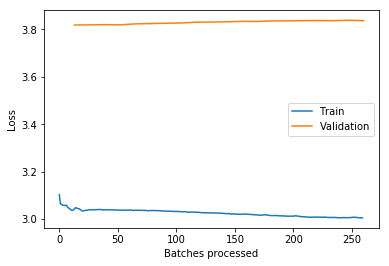

In [471]:
learn.recorder.plot_losses()

Looks like LSTM's give us a boost from ~27-28% to >29% accuracy. Would be interested in tweaking this further and playing around with different LSTM architectures. 

In [475]:
learn.save("lstm")

The code below is an attempt to get this model working with fastai's `predict` method. No such luck -- will need to investigate this further. 

In [486]:
# class LSTMModelPred(nn.Module):
     
#     def __init__(self):
#         super().__init__()
#         self.i_h = nn.Embedding(nv, nh)
#         self.h_o = nn.Linear(nh, nv)
#         self.bn = BatchNorm1dFlat(nh)
#         self.h = torch.zeros(1, 1, nh).cuda()
#         self.c = torch.zeros(1, 1, nh).cuda()
#         self.lstm = nn.LSTM(nh, nh, 1, batch_first=True, dropout=0.5) 
        
#     def forward(self, x):
#         res, (h, c) = self.lstm(self.i_h(x), (self.h, self.c))
#         self.h, self.c = h.detach(), c.detach()
#         return self.h_o(self.bn(res))

In [487]:
# learn2 = Learner(data, LSTMModelPred(), metrics=accuracy)

In [488]:
# learn2.load("lstm")

In [489]:
# learn2.predict("the ")

In [490]:
# learn.predict("the")